# РК1; ТМО; Сысойкин Егор; Вариант 16; ИУ5-64Б

## Задание. 
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы линейная/логистическая регрессия	и градиентный бустинг. Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.


* При решении задач можно выбирать любое подмножество признаков из приведенного набора данных.
* Для сокращения времени построения моделей можно использовать фрагмент набора данных (например, первые 200-500 строк).

Датасет: https://www.kaggle.com/san-francisco/sf-restaurant-scores-lives-standard

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("data/restaurant-scores-lives-standard.csv", sep=',')
data.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

In [3]:
data.isnull().sum()

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude            19556
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score             13610
inspection_type                  0
violation_id                 12870
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts         19594
Fire Prevention Districts    19646
Zip Codes                    19576
Analysis Neighborhoods       19594
dtype: int64

In [4]:
data.shape

(53973, 23)

In [5]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data2 = data.copy().dropna(axis=0, how='any')
data2.drop_duplicates(keep=False,inplace=True)

In [7]:
for col in data2.columns:
    unique_nums = data2[col].unique()
    if unique_nums.size < 10:
        print("{}: {}".format(col, unique_nums))

business_city: ['San Francisco']
business_state: ['CA']
inspection_type: ['Routine - Unscheduled']
risk_category: ['Low Risk' 'High Risk' 'Moderate Risk']


business_city: ['San Francisco'],
business_state: ['CA'],
inspection_type: ['Routine - Unscheduled'] - имеют 1 уникальное значение. Можно убрать.

<AxesSubplot:>

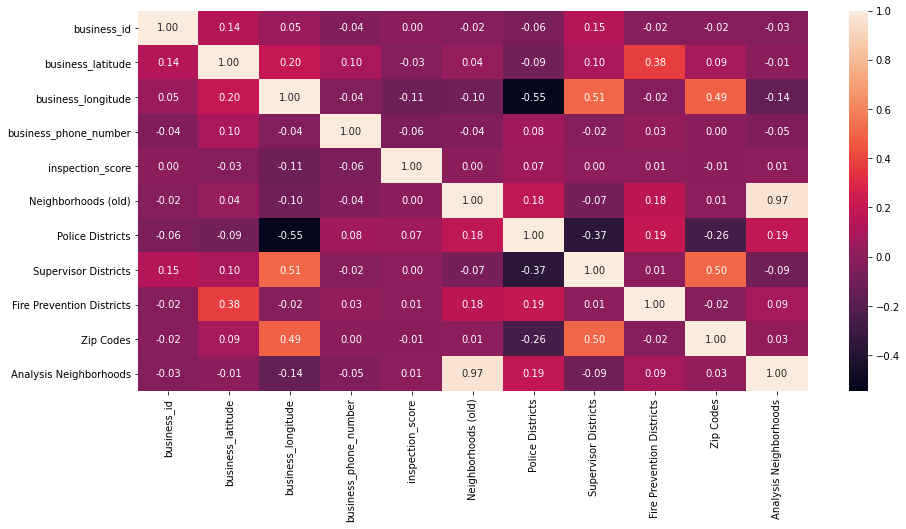

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data2.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [9]:
data2["risk_category"] = data2["risk_category"].astype('category')
data2["risk_category_cat"] = data2["risk_category"].cat.codes

data2.drop(["business_city", "business_state", "business_location", "business_name", 
            "business_address", "violation_description", "risk_category", "Neighborhoods (old)", "inspection_type",
            "inspection_id", "violation_id", "inspection_date"
           ], 
           axis=1, inplace=True)

In [10]:
data2["business_postal_code"].unique()

array(['94107', '94131', '94112', '94121', '94110', '94109', '94115',
       '94111', '94118', '94103', '94134', '94117', '94114', '94123',
       '94124', '94104', '94122', '94108', '94133', '94132', '941102019',
       '94127', '94102', '92672', '94105', '94116', '94158'], dtype=object)

In [11]:
data2["business_postal_code"] = data2["business_postal_code"].astype(int)

In [12]:
data2["Police Districts"] = data2["Police Districts"].astype(int)
data2["inspection_score"] = data2["inspection_score"].astype(int)
data2["Supervisor Districts"] = data2["Supervisor Districts"].astype(int)
data2["Fire Prevention Districts"] = data2["Fire Prevention Districts"].astype(int)
data2["Zip Codes"] = data2["Zip Codes"].astype(int)
data2["Analysis Neighborhoods"] = data2["Analysis Neighborhoods"].astype(int)

In [13]:
data2.isnull().sum()

business_id                  0
business_postal_code         0
business_latitude            0
business_longitude           0
business_phone_number        0
inspection_score             0
Police Districts             0
Supervisor Districts         0
Fire Prevention Districts    0
Zip Codes                    0
Analysis Neighborhoods       0
risk_category_cat            0
dtype: int64

In [14]:
data2.head()

,business_id,business_postal_code,business_latitude,business_longitude,business_phone_number,inspection_score,Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods,risk_category_cat
11,4794,94107,37.778634,-122.393089,1.415561e+10,71,2,9,6,28856,34,1
372,2684,94131,37.746759,-122.426995,1.415528e+10,87,7,5,2,63,22,0
464,3256,94112,37.709737,-122.450070,1.415534e+10,94,7,6,9,28861,28,1
484,3951,94121,37.779962,-122.485087,1.415539e+10,77,6,2,11,55,29,1
496,4864,94110,37.759174,-122.419066,1.415583e+10,78,4,7,2,28859,20,1


In [15]:
data2.dtypes

business_id                    int64
business_postal_code           int64
business_latitude            float64
business_longitude           float64
business_phone_number        float64
inspection_score               int64
Police Districts               int64
Supervisor Districts           int64
Fire Prevention Districts      int64
Zip Codes                      int64
Analysis Neighborhoods         int64
risk_category_cat               int8
dtype: object

In [16]:
target = "Supervisor Districts"

In [17]:
# Масштабирование
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in data2.columns:
  if col != target:
    data2[col] = scaler.fit_transform(data2[[col]])


<AxesSubplot:>

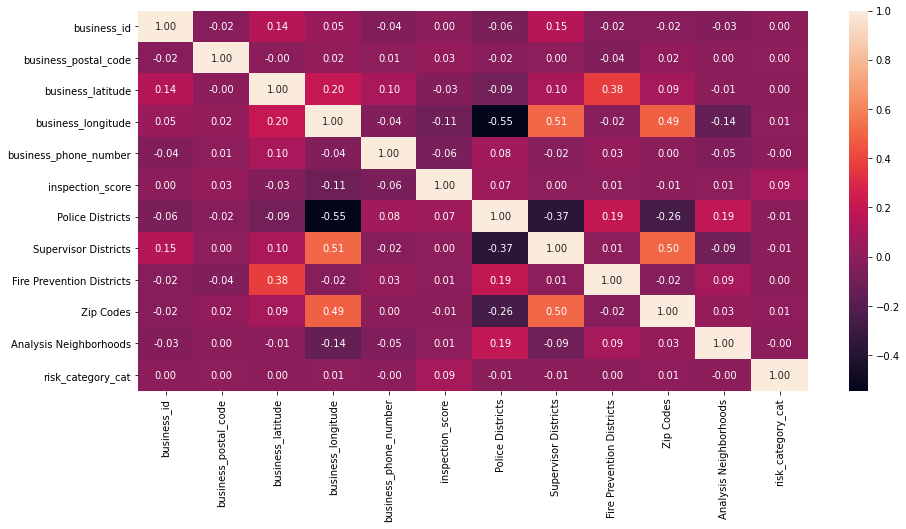

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data2.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [19]:
from sklearn.model_selection import train_test_split

feature_cols = ["business_latitude", "business_longitude", "Zip Codes"]

X_train, X_test, y_train, y_test = train_test_split(
  data2[feature_cols],
  data2[target],
  test_size=0.3,
  random_state=1,
)

### Линейная регреессия

In [20]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error

linreg_predict = linreg.predict(X_test)
r2_score(y_test, linreg_predict), \
  mean_absolute_error(y_test, linreg_predict)

(0.32634156097620515, 1.8639363772620643)

### Градиентный бустинг

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gboostreg = GradientBoostingRegressor(random_state=10).fit(X_train, y_train)

In [23]:
gboostreg_predict = gboostreg.predict(X_test)
r2_score(y_test, gboostreg_predict), \
  mean_absolute_error(y_test, gboostreg_predict)

(0.9155392208894986, 0.4158270828303186)

## Вывод

Как видно по тепловой карте, данные плохо коррелируют друг с другом. Поэтому для построения модели был выбрал целевой признак "Supervisor Districts", а в качестве ключевых признаков - ["business_latitude", "business_longitude", "Zip Codes"]. Как видно по оценкам, модель линейной регрессии недообучается, а модель градиентного бустинга хорошо обучается. Вторая модель имеет высокую оценку r2(близкую к 1) и низкую абсолютную ошибку(<1, что для целочисленного признака дает хороший результат). 